In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
data = np.load('./datasets/mnist_train_small.npy')


In [3]:
data.shape

(19999, 785)

In [4]:
data


array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [11]:
X = data[:, 1:]
y = data[:, 0]

In [12]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
X.shape, y.shape # each image is a sqroot of the number of images


((19999, 784), (19999,))

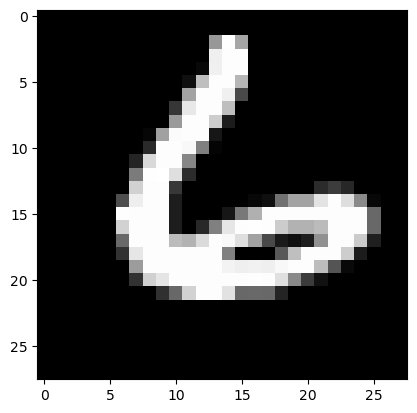

In [14]:
plt.imshow(x[100].reshape(28,28), cmap='gray')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)
...

In [19]:
X_train.shape, y_test.shape

((13399, 784), (6600,))

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
model = KNeighborsClassifier()

In [25]:
# training happens in fit function
# plotting the points on the graph
# no work is happening in training knn model
# not used in real world
model.fit(X_train, y_train)

KNeighborsClassifier()

In [27]:
model.predict(X_test[:10]) # here is when processing begisn to sort data

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [28]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

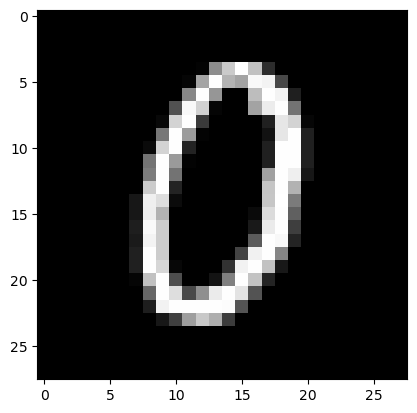

In [35]:
plt.imshow(X_test[2].reshape(28,28), cmap='gray')

In [37]:
model.score(X_test[:100],y_test[:100])

0.95

# Custom KNN - Implementation from scratch

In [41]:
# KNeighborsClassifier?


In [104]:
class CustomKNN:
    def __init__(self,n_neighbors=5):
        self.n_neighbors = n_neighbors
        
    #training function
    def fit(self, X,y):
        self._X = X.astype(np.int64) ##to handle large values for accuracy
        # self._X = (X- X.mean()) / X.std() #Standardisation
        ## Standardization --> mean as 0 and deviation as 1 - small ranges
        self._y = y
    
    #predict point
    def predict_point(self, point):
        # storing the dist of given point from each point in the training data
        list_dist = []
        # points from training data
        for X_point, y_point in zip(self._X, self._y): #zip merges (classifies) corrensponding array elemeents in different arrays
            dist_point =  ((point - X_point) **2).sum() # like in calculating hypotenuse
            list_dist.append([dist_point, y_point])
            
        ## sorting the list according to distance
        sorted_dist = sorted(list_dist)
        top_k = sorted_dist[:self.n_neighbors]
        
        ## sorting the counts
        items, counts = np.unique(np.array(top_k)[:,1], return_counts=True)
        ans = items[np.argmax(counts)]
        return ans
            
    # predict
    # provide answer for each number in the array
    def predict(self, X):
        results = []
        
        for point in X:
            results.append(self.predict_point(point))
            
        return np.array(results, dtype=int)
            
    # Score - measure accuracy
    def score(self, X,y):
        # compares values and sums only if true
        return sum(self.predict(X)==y) / len(y)
        

In [105]:
model2 = CustomKNN()

In [106]:
model2.fit(X_train, y_train)

In [107]:
model2.predict(X_test[:10])

array([1, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [108]:
y_test[:10]

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2], dtype=uint8)

In [109]:
model2.score(X_test[:100], y_test[:100])

0.95